# VADSTI 2021

# Module 2: Data Exploration and Visualization

# Exploratory Data Analysis (EDA)



This notebook provides recipes for exploratory data analysis which is a critical step in any data science project. The goal of this workshop is to learn how to perform initial investigations of the data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

## **I. Dataset**



We will use the diabetes dataset from the National Institute of Diabetes and Digestive and Kidney Diseases. 

The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. 

**Study population:** Female patients over 21 years old of Pima Indian heritage.

**Data dictionary:** The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

> - ***Pregnancies***: Number of times pregnant
- ***Glucose:*** Plasma glucose concentration over 2 hours in an oral 0 glucose tolerance test
- ***BloodPressure:*** Diastolic blood pressure (mm Hg)
- ***SkinThickness:*** Triceps skin fold thickness (mm)
- ***Insulin:*** 2-Hour serum insulin (mu U/ml)
- ***BMI:*** Body mass index (weight in kg/(height in m)2)
- ***DiabetesPedigreeFunction:*** Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
- ***Age:*** Age (years)
- ***Outcome:*** Class variable (0 if non-diabetic, 1 if diabetic)




[Link to dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database/download)

[Link to UCI Repository](https://archive.ics.uci.edu/ml/datasets/diabetes)

## **II. Reading and manipulating the data**

In this section we will read the diabetes dataset into a Pandas dataframe. The primary two components of pandas are the Series and DataFrame. A Series is essentially a column, and a DataFrame is a multi-dimensional table made up of a collection of Series.

### **1. Reading the data**

In [147]:
#install pandas
!sudo -H pip3 install pandas

In [61]:
# Importing pandas
import pandas as pd

In [62]:
# Reading data into a pandas dataframe: diabetes_df
diabetes_df = pd.read_csv('./datasets/diabetes.csv')

In [63]:
# View top 10 rows of diabetes_df
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


### **2. Initial invesitgation**

Let's perform initial investigations of the dataframe.

In [64]:
#What's the shape of our dataframe?
diabetes_df.shape

(768, 9)

In [65]:
#Dataframe Columns
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [66]:
#Column types
diabetes_df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [67]:
#Let's get a description of the dataframe
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [68]:
#Use .info() on the dataframe to get a summary of the columns
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [69]:
#What's the count breakdown of the Outcome variable
diabetes_df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### **3. Missing data**

When working with any dataset, you’ll most likely encounter missing or null values, which are essentially placeholders for non-existent values. Most commonly you'll see Python's ``None`` or NumPy's ``np.nan``, each of which are handled differently in some situations.

In [70]:
#Let's print how many missing values per column
diabetes_df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Let's visualize the missingness in our dataframe. We will use the ``missingno`` package  provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allows you to get a quick visual summary of the completeness (or lack thereof) of your dataset. 

Just pip install missingno to get started. [Github link](https://github.com/ResidentMario/missingno)

In [71]:
#install missingno package
!sudo -H pip3 install missingno

You should consider upgrading via the 'pip install --upgrade pip' command.


In [72]:
#Import missingno
import missingno as msno

**Missingness Matrix:** 
The `msno.matrix` nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.

<AxesSubplot:>

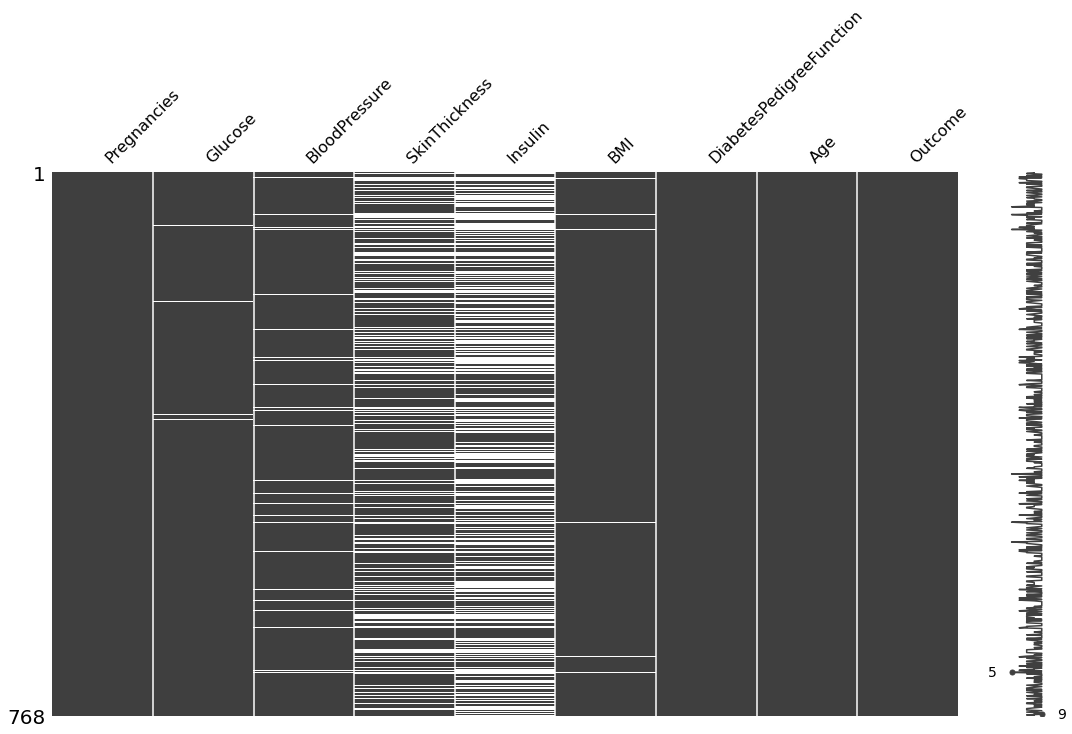

In [73]:
#Visualize missingness per column using the msno.matrix function
msno.matrix(diabetes_df,figsize=(18,10))

**Bar Chart** 
`msno.bar` is a simple visualization of nullity by column

<AxesSubplot:>

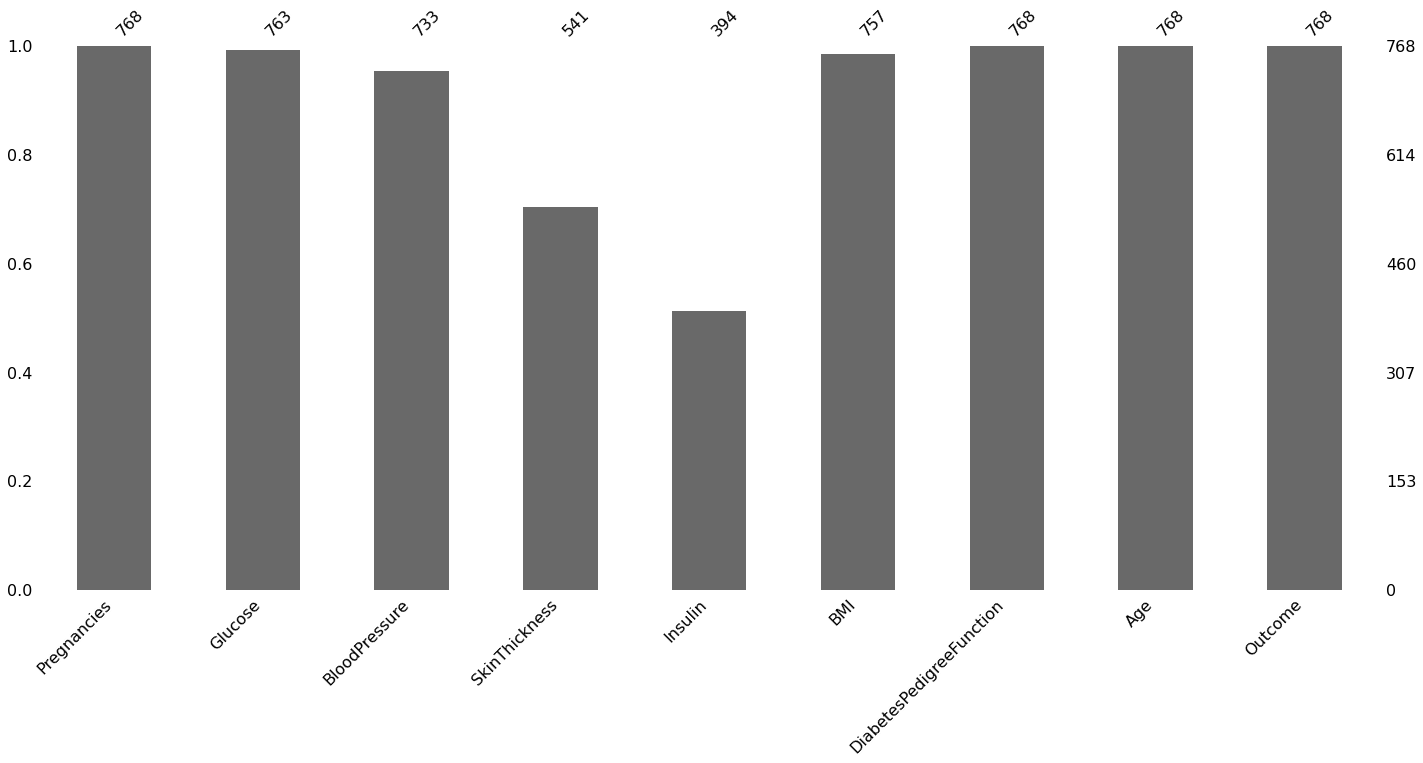

In [74]:
msno.bar(diabetes_df)

**Heatmap:** 
The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.

Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization—in this case for instance the datetime and injury number columns, which are completely filled, are not included

<AxesSubplot:>

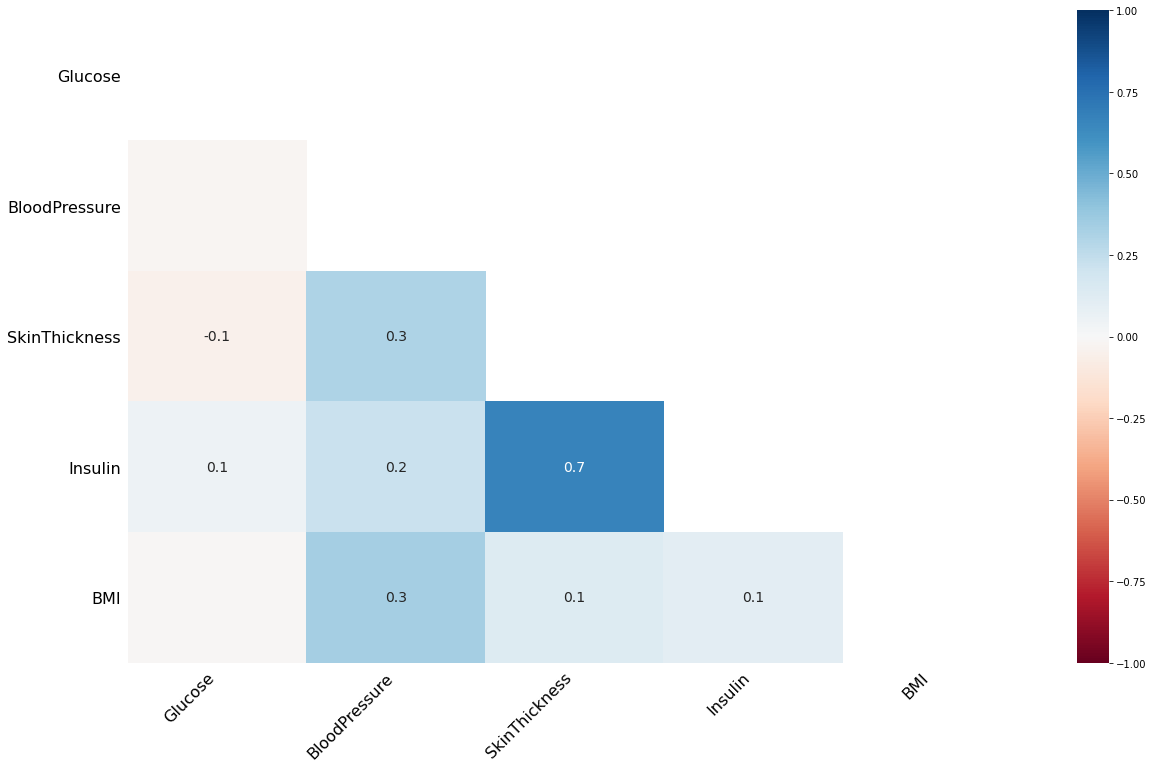

In [75]:
msno.heatmap(diabetes_df)

**Dendrogram**
The dendrogram function `msno.dendrogram` allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap:

<AxesSubplot:>

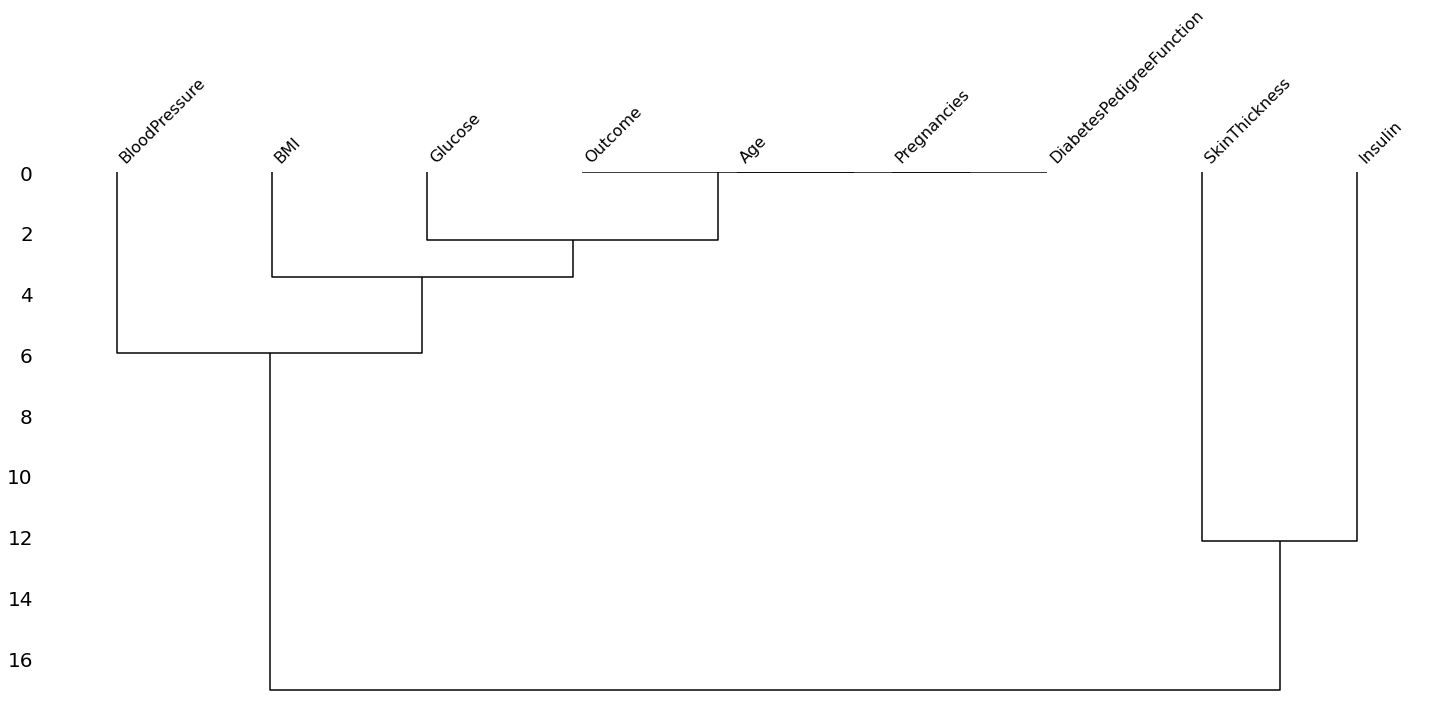

In [76]:
msno.dendrogram(diabetes_df)

### 4. Handling missing data

Understanding the reasons why data are missing is important for handling the remaining data correctly. If values are missing completely at random, the data sample is likely still representative of the population. But if the values are missing systematically, analysis may be biased. There are 3 types of missing data:

- ***Missing completely at random (MCAR)*** The propensity for a data point to be missing is completely random. The missing data are just a random subset of the data.

- ***Missing at random (MAR)*** Missing at Random means  the propensity for a data point to be missing is not related to the missing data, but it is related to some of the observed data. An example is that males are less likely to fill in a depression survey but this has nothing to do with their level of depression, after accounting for maleness. 

- ***Missing not at random (MNAR)*** (also known as nonignorable nonresponse) is data that is neither MAR nor MCAR (i.e. the value of the variable that's missing is related to the reason it's missing). To extend the previous example, this would occur if men failed to fill in a depression survey because of their level of depression.

Generally speaking, there are three main approaches to handle missing data: 

> - ***Omission***: where samples with invalid data are discarded from further analysis,
- ***Imputation:*** where values are filled in the place of missing data, 
- ***Analysis:*** by directly applying methods unaffected by the missing values. 

The choice of which methods to use is based on the use case and how the data was collected.

In [77]:
#Listwise deletion (row deletion)
diabetes_final = diabetes_df.dropna()
diabetes_final.shape

(392, 9)

In [78]:
#Drop columns with missing data
diabetes_final = diabetes_df.dropna(axis=1)
diabetes_final.shape

(768, 4)

In [79]:
#Impute using a constant
diabetes_final = diabetes_df.fillna(0)
diabetes_final

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183.0,64.0,0.0,0.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,0.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,0.0,0.0,30.1,0.349,47,1


In [80]:
#Imputing using mean
diabetes_final = diabetes_df.fillna(diabetes_df.mean())
diabetes_final

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [81]:
#Check the dataframe for missing data
diabetes_final.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Imputation using k-Nearest Neighbors

Next, we will explore imputation for completing missing values using k-Nearest Neighbors. 

**How does it work?**  According scikit-learn docs: 

``Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close. By default, a euclidean distance metric that supports missing values, nan_euclidean_distances, is used to find the nearest neighbors.``

We need to install the sklearn package and import KNNImputer.

In [82]:
#Install sklearn
!sudo pip3 install sklearn

     |████████████████████████████████| 22.2MB 19.2MB/s eta 0:00:01
  Stored in directory: /home/codio/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
You should consider upgrading via the 'pip install --upgrade pip' command.


In [83]:
##import KNNImputer
from sklearn.impute import KNNImputer

#Create a KNNImputer with n_neighbors=5
imputer = KNNImputer(n_neighbors=5)

#Apply imputer to the dataframe
diabetes_final = pd.DataFrame(imputer.fit_transform(diabetes_df),columns = diabetes_df.columns)
diabetes_final

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,165.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,35.2,134.2,30.1,0.349,47.0,1.0


### **4. Filtering and transofrming the data**

Based on the data use case, you might need to perform data transformations including subseting or filtering the data, creating categorical variables, or applying certain data manipulations. In this section, we review some examples.

**Creating an age group variable**

In [84]:
#Use the describe() function to review a summary of the Age column
diabetes_final['Age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

<AxesSubplot:>

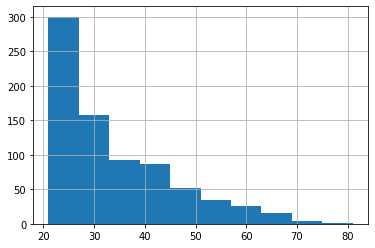

In [85]:
#Histogram of age variable
diabetes_df.Age.hist()

In [86]:
#Binning the Age column using pd.cut function
import numpy as np

diabetes_final['age_group'] = pd.cut(diabetes_final['Age'], bins=[0,18,45,65,np.inf], labels=['<18','18-44', '45-64', '65>'],right=False)
diabetes_final.age_group.value_counts()

18-44    635
45-64    117
65>       16
<18        0
Name: age_group, dtype: int64

**Filtering data**

Filtering data using conditions

In [87]:
#diabetes_final[diabetes_final['age_group'] == "65>"]
diabetes_final[(diabetes_final['Age'] > 65)]
#diabetes_final[(diabetes_final['Age'] > 65) | (diabetes_final['Age']<45) ]
#diabetes_final[(diabetes_final['Age'] > 65) & (diabetes_final['bmi']>30) ]
#diabetes_final[(diabetes_final['Age'] > diabetes_final['Age'].quantile(0.25))]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_group
123,5.0,132.0,80.0,24.8,281.2,26.80,0.186,69.0,0.0,65>
221,2.0,158.0,90.0,26.2,188.6,31.60,0.805,66.0,1.0,65>
363,4.0,146.0,78.0,26.2,227.6,38.50,0.520,67.0,1.0,65>
453,2.0,119.0,82.8,22.8,249.8,19.60,0.832,72.0,0.0,65>
459,9.0,134.0,74.0,33.0,60.0,25.90,0.460,81.0,0.0,65>
489,8.0,194.0,80.0,48.4,331.0,26.10,0.551,67.0,0.0,65>
495,6.0,166.0,74.0,30.4,211.0,26.60,0.304,66.0,0.0,65>
537,0.0,57.0,60.0,31.8,108.4,21.70,0.735,67.0,0.0,65>
552,6.0,114.0,88.0,21.0,284.2,27.80,0.247,66.0,0.0,65>
666,4.0,145.0,82.0,18.0,149.2,32.50,0.235,70.0,1.0,65>


**Using the apply function**

We will write a function to group BMI and use the 'apply' to generate a new bmi_group column

In [88]:
# Function takes as an input the bmi and output a bmi group 
# x<18.5 -> Unhealthy low
def bmi_groups(x):
    if x <18.5:
        return "Unhealthy Low"
    if x>=18.5 and x<25:
        return "Healthy"
    if x>=25 and x<30:
        return "Overweight"
    if x>=30:
        return "Obese"    

Now let's use the apply function to group BMI

In [89]:
diabetes_final["bmi_category"] = diabetes_final["BMI"].map(bmi_groups)
diabetes_final.bmi_category.value_counts()

Obese            477
Overweight       185
Healthy          102
Unhealthy Low      4
Name: bmi_category, dtype: int64

## **III. Data Visualization**


Let’s also look at how many people in the dataset are diabetic and how many are not. Below is the barplot of the same:

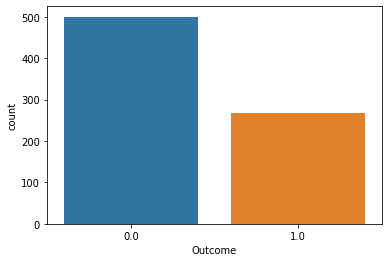

In [90]:
#Use the seaborn package to plot bar plots of the Outcome variable
import seaborn as sns
ax = sns.countplot(x="Outcome", data=diabetes_final)

<BarContainer object of 4 artists>

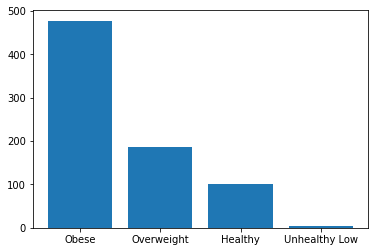

In [91]:
#Use matplotlib package to plot bar plot of the bmi_category variable
import matplotlib.pyplot as plt
from collections import Counter

counter = Counter(diabetes_final.bmi_category)

plt.bar(counter.keys(),counter.values())
#locator = matplotlib.ticker.MultipleLocator(1)
#plt.gca().xaxis.set_major_locator(locator)
#plt.show()

<AxesSubplot:>

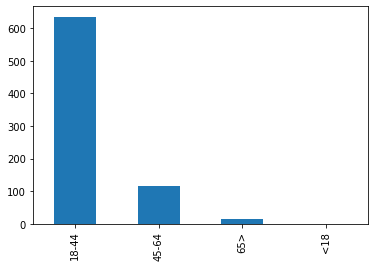

In [92]:
#Use pandas vizualisation to plot bar plot of the age_group variable
diabetes_final.age_group.value_counts().plot.bar()

Let's plot the reltionship between age and bmi or age and other variables using a scatter plot.

<AxesSubplot:title={'center':'Age vs BMI'}, xlabel='Age', ylabel='BMI'>

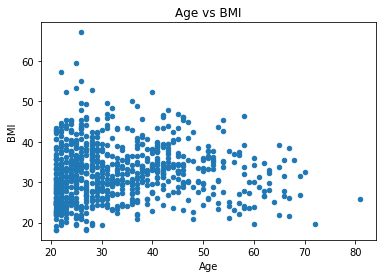

In [93]:
diabetes_final.plot(kind='scatter', x='Age', y='BMI', title='Age vs BMI')

It is also helpful to visualize relations between a single variable and the outcome.

<AxesSubplot:title={'center':'Glucose'}, xlabel='[Outcome]'>

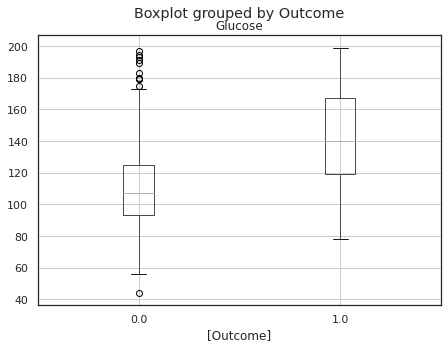

In [143]:
#Using pandas visualization to plot boxplots
diabetes_final[['Glucose','Outcome']].boxplot(by='Outcome',figsize=(7,5))

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

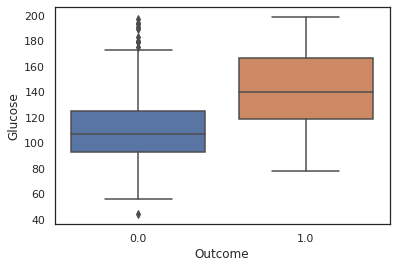

In [146]:
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_final)

Sometimes we can use a combination of visualization packages

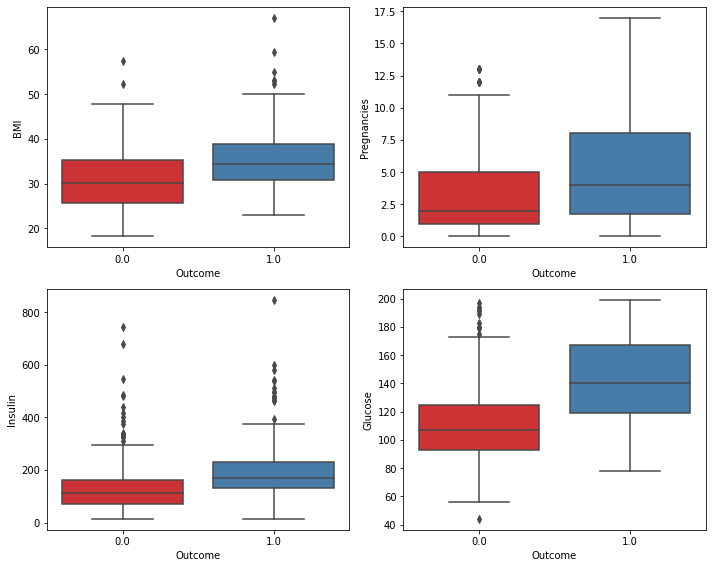

In [96]:
import matplotlib.pyplot as plt

features = ['BMI','Pregnancies','Insulin','Glucose']
rows = int(len(features)/2)    

plt.figure(figsize=(10,8))
    
for i, feature in enumerate(features):
    plt.subplot(rows, 2, i+1)    
    sns.boxplot(x='Outcome', y=feature, data=diabetes_final, palette="Set1")

plt.tight_layout()
plt.show()

A scatter matrix is a estimation of covariance matrix. It helps visualize difference between variables in the dataset

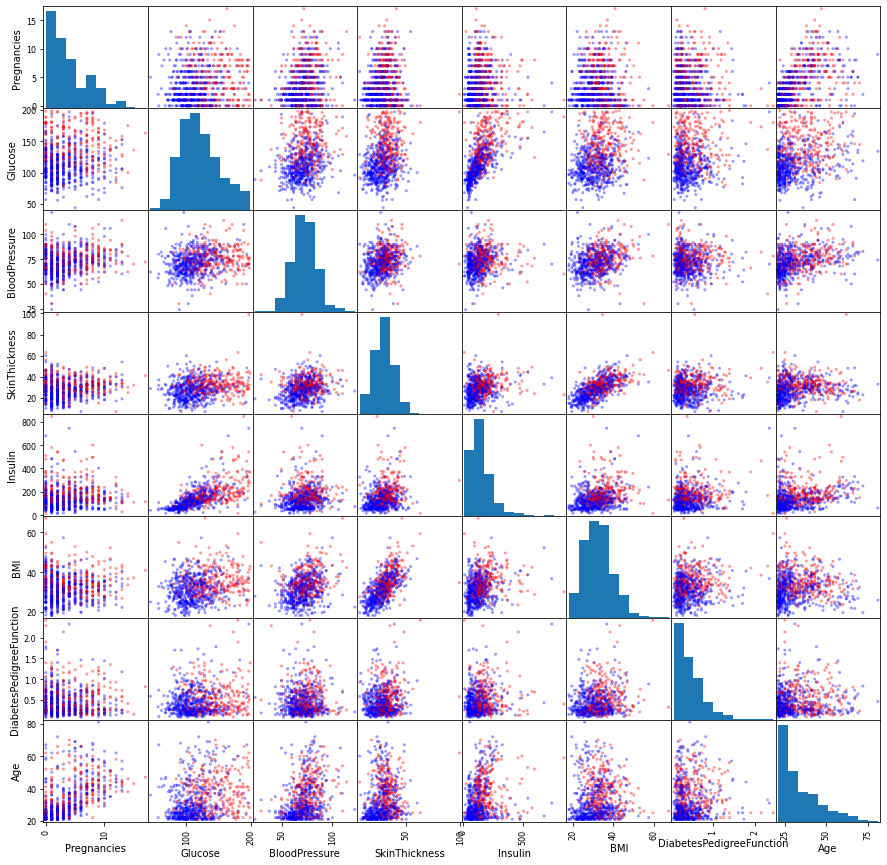

In [97]:
from pandas.plotting import scatter_matrix

color_dic = {1:'red', 0:'blue'}
colors = diabetes_final['Outcome'].map(lambda x: color_dic.get(x))

sm = scatter_matrix(diabetes_final.drop('Outcome', axis=1), c=colors, alpha=0.4, figsize=((15,15)));

plt.show()

## **IV. Correlations**

We measure correlation of two numerical variables to find an insight about their relationships. On a dataset with many attributes, the set of correlation values between pairs of its attributes form a matrix which is called a correlation matrix.

We can use pandas `.corr` function to generate correlations between columns or a correlation matrix. 

In [98]:
#Correlation between Age and BMI
column_1 = diabetes_df["BMI"]
column_2 = diabetes_df["Age"]
correlation = column_1.corr(column_2)
print(correlation)

0.025841458169262005


In [121]:
#Using Pearson correlation to generate a 
corr = diabetes_df.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)#.to_excel('correlation_matrix_pearson.xlsx')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.21,0.10,0.08,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.22,0.23,0.58,0.23,0.14,0.27,0.49
BloodPressure,0.21,0.22,1.00,0.23,0.10,0.29,-0.00,0.33,0.17
SkinThickness,0.10,0.23,0.23,1.00,0.18,0.65,0.12,0.17,0.26
Insulin,0.08,0.58,0.10,0.18,1.00,0.23,0.13,0.22,0.30
BMI,0.02,0.23,0.29,0.65,0.23,1.00,0.16,0.03,0.31
DiabetesPedigreeFunction,-0.03,0.14,-0.00,0.12,0.13,0.16,1.00,0.03,0.17
Age,0.54,0.27,0.33,0.17,0.22,0.03,0.03,1.00,0.24
Outcome,0.22,0.49,0.17,0.26,0.30,0.31,0.17,0.24,1.00


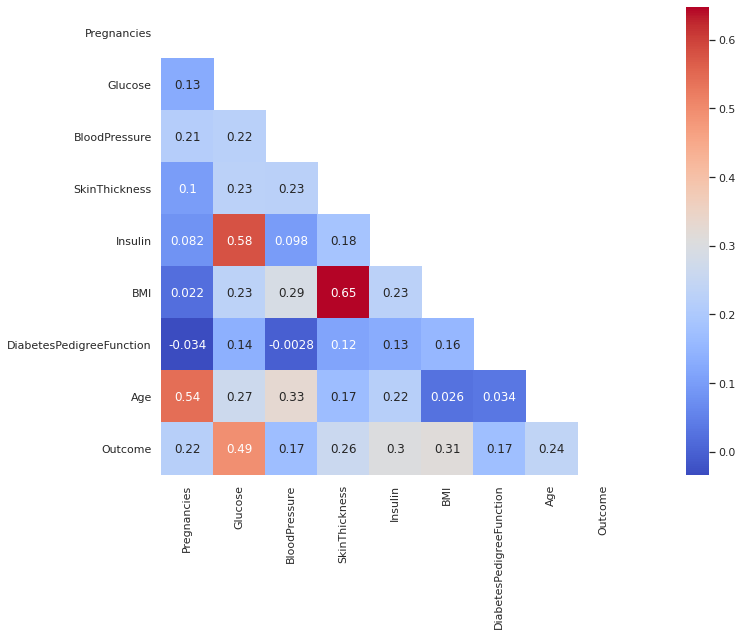

In [133]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#look at feature correlations
corr = diabetes_df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

#make the heatmap plot
plt.figure(figsize=(16,9))
sns.heatmap(corr, mask=mask, annot = True,cmap='coolwarm', square=True)#, vmax=1, vmin=-1,center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.tight_layout()
plt.savefig('heatmap.png', dpi=250)
plt.show()

In [151]:
#!sudo -H pip3 install statsmodels
from statsmodels.graphics.mosaicplot import mosaic

     |████████████████████████████████| 9.5MB 9.5MB/s eta 0:00:01
     |████████████████████████████████| 235kB 73.3MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


## **V. Generate a data exploration report**


Let's use pandas_profiling library to generate a report for the variables in the dataset

In [148]:
#install pandas-profiling
#!sudo -H pip3 install -U pandas-profiling

In [ ]:
import pandas_profiling

# Reading data into a pandas dataframe: diabetes_df
diabetes_df = pd.read_csv('./datasets/diabetes.csv')

profile = pandas_profiling.ProfileReport(diabetes_df)
profile.to_file("./exports/profiling_report.html")